---
format:
  html:
    other-links:
      - text: This notebook
        href: L24-LinearLeastSquares.ipynb
      - text: preamble.jl
        href: preamble.jl
---


# Linear Least Squares

::: {.callout-note}

These notes are mainly a record of what we discussed and are not a substitute for attending the lectures and reading books! If anything is unclear/wrong, let me know and I will update the notes. 

::: 

In [276]:
# | include: false

include("preamble.jl");
using Images

✓ file included! 

using: Plots, LaTeXStrings, Polynomials, PrettyTables, LinearAlgebra 

functions included: 
    Ch2: simple_iteration, Newton, orderOfConvergence, 
    Ch3: ChebyshevNodes, ChebyshevInterpolant, Lagrange, 

Use @doc <<function>> for help


## Linear Least Squares

Let us consider a rectangular linear system of equations: $A \bm x = b$ where $A \in \mathbb R^{m\times n}$ with $m > n$. 

::: {#nte-example1 .callout-note}
# Example

Consider 

\begin{align}
    \begin{pmatrix}
        1 & 0 \\ 
        0 & 1 \\
        1 & 1 
    \end{pmatrix}
    \begin{pmatrix}
        x \\ 
        y
    \end{pmatrix}
    = 
    \begin{pmatrix}
        1 
        \\ 
        1 
        \\
        1
    \end{pmatrix}.
\end{align} 

This reads: $x = y = 1$ and $x + y = 1$. Therefore there is no solution! We say the matrix equation is *overdetermined*.

What does Julia think about this?:

::: 

In [281]:
A = [ 1 0 ; 0 1 ; 1 1 ]
b = [ 1 ; 1 ; 1 ]

A \ b

2-element Vector{Float64}:
 0.6666666666666665
 0.6666666666666667

::: {.callout-note icon=false}
# @nte-example1 cont.

What does $\bm x = ( \frac23 , \frac23 )^\intercal$ have to do with $A$ and $b$? 

We can see that 

\begin{align}
    \begin{pmatrix}
        1 & 0 \\ 
        0 & 1 \\
        1 & 1 
    \end{pmatrix}
    \begin{pmatrix}
        \frac23 \\ 
        \frac23
    \end{pmatrix}
    = 
    \frac23
    \begin{pmatrix}
        1 
        \\ 
        1
        \\
        2
    \end{pmatrix}.
\end{align}

You can show that the *residual* $\left|A \bm x -b\right|$ is equal to $\frac{\sqrt{3}}{3}$. Could we have chosen $\bm x$ so the error between $A \bm x$ and $b$ was smaller?

\begin{align}
    |A \bm x - b|^2 &= \left| 
 \begin{pmatrix}
        1 & 0 \\ 
        0 & 1 \\
        1 & 1 
    \end{pmatrix}
    \begin{pmatrix}
        x \\ 
        y
    \end{pmatrix}
    -
    \begin{pmatrix}
        1 
        \\ 
        1 
        \\
        1
    \end{pmatrix}
   \right|^2 \nonumber\\
   %
   &= \left| 
    \begin{pmatrix}
        x-1 
        \\ 
        y-1 
        \\
        x+y-1
    \end{pmatrix}
   \right|^2 \nonumber\\
   %
   &= (x-1)^2 + (y-1)^2 + (x+y-1)^2. \nonumber
\end{align}

Intuitively, you can see that, in order to minimise this quantity, we want to make each term equally small: $(x-1)^2 = (y-1)^2 = (x+y-1)^2$. You can achieve this when $x = y = \frac23$, which is what Julia did!

:::

There are many situations where we might want to approximately solve $A \bm x = b$ e.g. Statistics: 

### Population of the UK 

Here we consider the population of the UK in the years since 1970:

Data from @ons

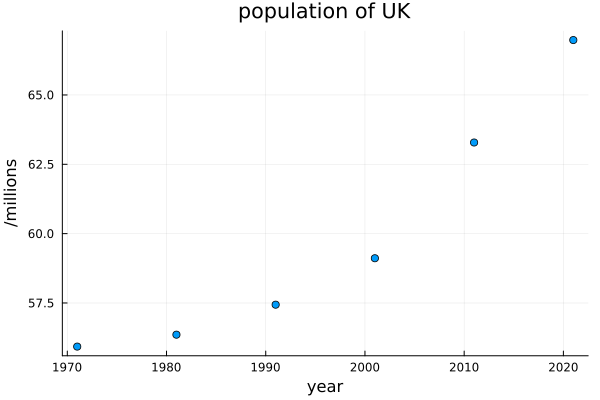

In [ ]:
years = 1971:2024
pop = [
    55928000    56096700    56222900    56235600    56225700    56216100    56189900    56178000    56240100    56329700    56357500    56290700    56315700    56409300    56554000    56683800    56804000    56916400    57076500    57237500    57438700    57584500    57713900    57862100    58024800    58164400    58314200    58474900    58684400    58886100    59113000    59365700    59636700    59950400    60413300    60827000    61319100    61823800    62260500    62759500    63285100    63710500    64138200    64618700    65087000    65605800    65964300    66286700    66627500    66739900    66978000    67636100    68526200    69281400
]
r = 1:10:54  
x = years[r]
y = pop[r]
scatter( x, y/1e6 , title="population of UK", xlabel="year", ylabel="/millions", legend=false)

One way of fitting the data exactly would be to consider the polynomial interpolation of the data (see Chapter 3). 

In the following, we measure time since 1970 to make the numbers smaller and improve the conditioning of the interpolation problem.


Polynomial(56.14920446749999 - 0.2674673070833299*x + 0.04895897833333291*x^2 - 0.002763642499999981*x^3 + 6.807416666666631e-5*x^4 - 5.704166666666641e-7*x^5)

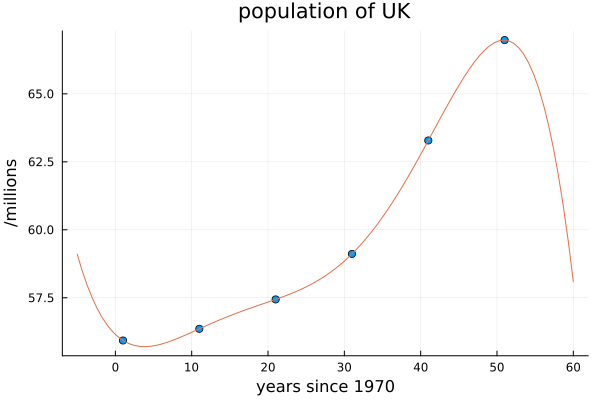

In [26]:
p_interp = fit( r, y/1e6 )
display(p_interp)
scatter( r, y/1e6 , title="population of UK", ylabel="/millions",)
plot!( p_interp , -5 , 60, legend=false, xlabel="years since 1970" )

You probably have already noticed that this is a bad approximation in this context (e.g. the population before 1970 was not larger than in 1970 and (hopefully) the population will not drop sharply as indicated above). In statistics, this phenomena is known as *overfitting*.

It turns out that I did not plot all of the data points and so we can actually measure the *testing error* (that is the error on the data points that we left out when we came up with our model):

training error: 6.355287432313019e-14
testing error: 3.947571417338935


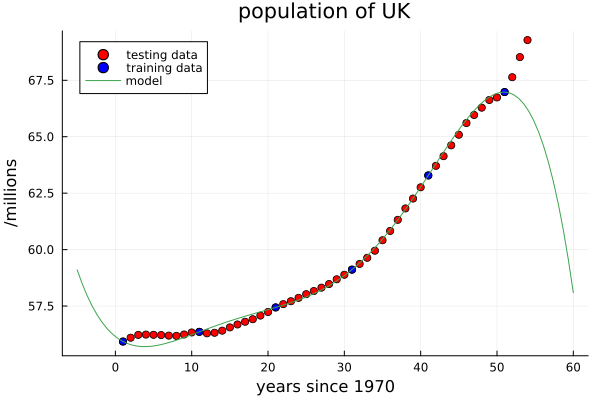

In [285]:
scatter( pop'/1e6 , title="population of UK", label="testing data", xlabel="years since 1970", ylabel="/millions",color="red")

println( "training error: ",  norm( p_interp.(r) - y/1e6 ) )
println( "testing error: ",  norm( p_interp.(1:54) - pop'/1e6 ) )

scatter!( r, y/1e6 , title="population of UK", label="training data", xlabel="years since 1970", ylabel="/millions",color="blue")
plot!( p_interp, -5, 60, label="model" )

Here, we can see that indeed the "model" does not capture the correct behavour outside the *training data* (i.e. the data points we used in order to derive the model in the first place).

Instead it may be useful to "fit" the data using a low degree polynomial, for example. In order to do this, we set up a (overdetermined) linear system of equations $A \bm x \approx b$ and try to minimise the error in this approximation. First suppose that the data can be decribed by the linear function $y \approx p(t) = c_1 + c_2 t$ where $p$ is the population at time $t$. Suppose we have the data points $(t_1,y_1),\dots,(t_m,y_m)$ and notice that we want

\begin{align}
    \bm y = 
    \begin{pmatrix}
        y_1 \\ y_2 \\ \vdots \\ y_m
    \end{pmatrix} 
    %
    &\approx \begin{pmatrix}
        p(t_1) \\ p(t_2) \\ \vdots \\ p(t_m)
    \end{pmatrix} 
    %
    = \begin{pmatrix}
        1 & t_1 \\
        1 & t_2 \\
        \vdots & \vdots \\
        1 & t_m
    \end{pmatrix}
    \begin{pmatrix}
        c_1 \\ c_2 
    \end{pmatrix}
\end{align}

In order to solve this equation approximately, we may again use the ```\ b``` operator as we did in @nte-example1:

training error: 3.206666526918118
testing error: 10.088011997522381


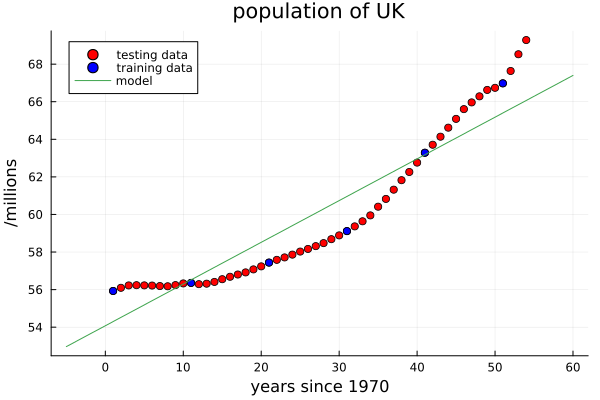

In [ ]:
n = 1
V = r.^(0:n)'
p = Polynomial( V \ (y/1e6) )

scatter( pop'/1e6 , title="population of UK", label="testing data", xlabel="years since 1970", ylabel="/millions",color="red")
println( "training error: ",  norm( p.(r) - y/1e6 ) )
println( "testing error: ",  norm( p.(1:54) - pop'/1e6 ) )
scatter!( r, y/1e6 , title="population of UK", label="training data",color="blue")
plot!( p, -5, 60, label="model" )

We can see that the testing error for this model is actually worse than the polynomial interpolation! The model is too simple to capture what is actually happening. We can add complexity to the model by choosing a higher degree polynomial: $p(t) = c_1 + c_2 t + c_3 t^2$ and so we want 

\begin{align}
    \bm y = 
    %
    &\approx \begin{pmatrix}
        p(t_1) \\ p(t_2) \\ \vdots \\ p(t_m)
    \end{pmatrix} 
    %
    = \begin{pmatrix}
        1 & t_1 & t_1^2\\
        1 & t_2 & t_2^2\\
        \vdots & \vdots \\
        1 & t_m & t_m^2
    \end{pmatrix}
    \begin{pmatrix}
        c_1 \\ c_2 \\ c_3
    \end{pmatrix}.
\end{align}

Doing this indeed reduces the testing error:

training error: 0.7000921851544214
testing error: 2.4978049313214417


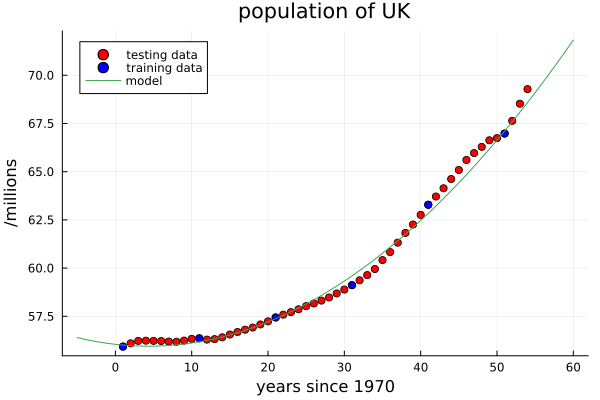

In [289]:
n = 2
V = r.^(0:n)'
p = Polynomial( V \ (y/1e6) )

scatter( 1:54, pop'/1e6 , title="population of UK", label="testing data", xlabel="years since 1970", ylabel="/millions",color="red")

println( "training error: ",  norm( p.(r) - y/1e6 ) )
println( "testing error: ",  norm( p.(1:54) - pop'/1e6 ) )

scatter!( r, y/1e6 , title="population of UK", label="training data", xlabel="years since 1970", ylabel="/millions",color="blue")
plot!( p, -5, 60, label="model" )

This is known as linear least squares (because we are minimising $|Ax-b|^2$). The choice of polynomials is somewhat arbitrary: we still get an overdetermined linear system of equations if we instead took $p(t) = c_1 + c_2 t + c_3 t^3 + c_4 \cos t$ 

training error: 0.5283726651045577
testing error: 3.3411811246054257


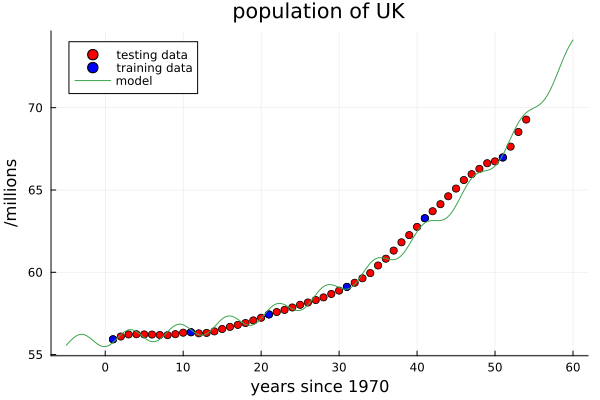

In [290]:
# Different basis functions:

f(t) = 1
g(t) = t
h(t) = t^3
j(t) = cos(t)

A = [f.(r) g.(r) h.(r) j.(r)]
c = A \ (y/1e6) 

p′(x) = c[1] * f(x) + c[2] * g(x) + c[3] * h(x) + c[4] * j(x)

scatter( 1:54, pop'/1e6 , title="population of UK", label="testing data", xlabel="years since 1970", ylabel="/millions",color="red")

println( "training error: ",  norm( p′.(r) - y/1e6 ) )
println( "testing error: ",  norm( p′.(1:54) - pop'/1e6 ) )

scatter!( r, y/1e6 , label="training data", xlabel="years since 1970", ylabel="/millions",color="blue")
plot!( p′, -5, 60, label="model" )

:::{.callout-note}
# Theorem (Linear Least Squares)

Suppose $x$ solves the *normal equations* $A^TAx = bx$. Then, $x$ minimises the error $|Ax - b|$.

:::

:::{.callout-note icon=false}
# Proof 

Suppose that $x$ solves the normal equations and $\delta x \in \mathbb R^{n}$. Notice that $|u+v|^2 = |u|^2 + 2 v^T u + |v|^2$ and so we have

\begin{align}
    |A(x+\delta x) - b|^2 &= |(Ax-b) + A\delta x|^2 \nonumber\\
    %
    &= |Ax-b|^2 + 2(\delta x)^T A^T(Ax - b) + |A\delta x|^2 \nonumber\\
    %
    &= |Ax-b|^2  + |A\delta x|^2 \nonumber\\
    %
    &\geq |Ax-b|^2.
\end{align}

That is $x$ is a minimiser of the function $y \mapsto |Ay - b|$.

:::

:::{.callout-note icon=false}
# Remark

Where do the normal equations come from? Since $|Ax-b|^2 = (Ax-b)^T(Ax-b)$, you can show that the derivative with respect to $x_k$ is

\begin{align}
    \frac{\mathrm{d}}
    {\mathrm{d}x_k}
    \left( \sum_{i=1}^n (Ax-b)_i (Ax-b)_i \right)
    %
    &= 2\sum_{i=1}^n A_{ik} (Ax - b)_i
    %
    = 2 \big( A^T(Ax - b) \big)_k.
\end{align}

Therefore, the set of critical points of the function $y \mapsto |Ay-b|^2$ satisfy $A^T(Ax - b) = 0$.

:::

Therefore, in order to solve the linear least squares problem, we could solve $A^TA x = A^T b$ which is now a square matrix equation that we have seen how to deal with (i.e. (P)LU decomposition + forwards and backwards substitution). The problem is that "$\kappa(A^TA) = \kappa(A)^2$" (one can define the condition number of a rectangular matrix but we haven't seen the definition) and so for large matrices, this problem is ill-conditioned.

Instead: the built-in function in Julia uses the so-called QR-factorisation which plays the role of the LU decomposition but for solving overdetermined systems of equations. We may return to this in the last week of semester but we just saw the very basics:

Suppose that $A \in \mathbb R^{m \times n}$ such that $A = QR$ with $Q \in \mathbb R^{m\times n}$ with orthonormal columns (i.e. $Q^{T} Q = I$) and $R \in \mathbb R^{m\times m}$ upper triangular. If one has such a decomposition, then  

\begin{align}
    A^T A x = (QR)^T (QR) x
    %
    = R^T Q^TQR x
    %
    = R^T R x
\end{align}

and 

\begin{align}
    A^T b = (QR)^T b = R^T Q b
\end{align}


It turns out that if $A$ has linearly independent columns, then $R^T$ is invertible and $A^TAx = A^Tb$ is equivalent to $R x = Q b$. Solving this system is possible by backwards substitution. 